<!--Header-->
<div style="background: #555">
    <div style="background-color: #fff; color: black; padding-bottom: 20px; display: flex; justify-content: space-between; align-items: flex-start;">
        <div style="width: 60%;">
            <h1 style="margin: 16px">TFG - Inteligencia Artificial</h1>
            <p style="margin: 16px; padding-bottom: 0">Junio de 2025</p>
        </div>
        <div style="width: 40%; text-align: right">
            <img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" alt="Logo UOC">
        </div>
    </div>
    <h2 style="color: #fff; text-align: justify; padding: 0 16px">Aplicación de técnicas de IA fiable en la predicción del índice de calidad de vida en personas con tratamiento oncológico mediante aprendizaje automático.</h2>
    <div style="padding: 20px; color: #fff; display: flex; flex-direction: column;">
        <h4 style="margin: 0 0; padding: 0 0">Pablo Pimàs Verge</h4>
        <h5 style="margin: 0 0; padding: 0 0">Grado en Ingeniería Informática</h5>
        <h5 style="margin: 0 0 4px; padding: 0 0">Inteligencia Artificial</h5>
        <h4 style="margin: 8px 0 4px; padding: 0 0">Dra. María Moreno de Castro</h4>
        <h4 style="margin: 0 0; padding: 0 0">Dr. Friman Sanchéz</h4>
    </div>
</div>

<!--/Header-->

# Fase 2

# Análisis exploratorio y preparación de los datos
En el presente cuaderno se realizarán las tareas de exploración y preparación de los datos que serán utilizados durante todo el trabajo. Este proceso corresponde a la fase 2 del marco CRISP-DM y la planificación del proyecto.

Los datos han sido compartidos por Gebert Pimrapat en el repositorio Mendeley Data [1] y corresponden a la encuesta realizada por la Charité – Universitätsmedizin Berlin, a mujeres en el inicio del tratamiento de cáncer de mama, entre 2016 y 2021. 

La encuesta consta de tres partes: datos basales socio-demográficos, formulario genérico para cáncer EORTC QLQ-C30 y módulo específico para cáncer de mama EORTC QLQ-C23. Para el trabajo se utilizarán los datos referentes a los índices calculados del formulario QLQ-C30. Por lo tanto, los objetivos del análisis y la preparación son los siguientes:

- Separar el conjunto en los 3 dominios: basales, C30 y C23
- Para el conjunto C30:
    - Analizar y explorar la calidad de los datos
    - Separar los valores faltantes en otro subconjunto para su posterior utilización
    - Preparar las variables para la utilización de los algoritmos basados en árboles de decisión
    - Convertir la variable objetivo en 3 clases para la clasificación
    - Separar los datos en los conjuntos de: entrenamiento, prueba, validación y calibración

### Librerías y Configuración
- Importación del software necesario para la manipulación, visualización y transformación de los datos. 
- Configuración del cuaderno y opciones de visualización

In [157]:
# Importaciones
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import KBinsDiscretizer


In [129]:
# Configuraciones
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
plt.rc('font', size=10)

### Carga de los datos

In [130]:

file_path = "../data/Data_PROM_Baseline.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

## 1 Análisis Exploratorio

### 1.1 Información

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1727 non-null   int64  
 1   age                         1478 non-null   float64
 2   weight                      1542 non-null   float64
 3   height                      1538 non-null   float64
 4   bmi                         1537 non-null   float64
 5   maritial_status             1482 non-null   float64
 6   education                   1540 non-null   float64
 7   alcohol                     1544 non-null   float64
 8   smokingstatus               1544 non-null   float64
 9   bust                        1544 non-null   float64
 10  cupsize                     1544 non-null   float64
 11  menstruation_firsttime_age  1544 non-null   float64
 12  menopause_yn                1544 non-null   float64
 13  birth_number                992 n

Los datos están compuestos por 66 variables y 1727 observaciones. Contienen datos faltantes en todas las variables y son de tipo numérico a excepción de breastcancer_first que es de tipo objeto. 

A continuación, se ordenan las variables por dominio y se detalla el diccionario de datos.

### Diccionario



#### Atributos Basales
Información sobre aspectos socio-demográficos y la historia clínica de las pacientes en el momento del registro.

- Age: edad, en años
- weight: peso, en kg
- height: altura, en cm
- bmi: índice de masa corporal, en kg/cm$^2$
- marital_status: estado civil, 0: soltera | 1: en pareja | 2: separada | 3: viuda
- education: nivel de educación, 0: bajo | 1: medio | 2: alto
- alcohol: frecuencia del consumo de alcohol, 0: nunca | 1: ocasional | 2: semanal | 3: diaria
- smokingstatus: fumadora, 0: no | 1: si | 2: ex fumadora
- bust: dimensión del busto, de 1 a 13 hace referencia a los centímetros desde 65 hasta 125 con saltos de 5
- cupsize: medida del busto con relación al contorno del dorso, de 1 a 9 hace referencia a las tallas desde AA hasta H
- menstruation_firsttime_age: edad de la primera menstruación, en años
- menopause_yn: estado de menopausia, 0: no | 1: si
- birth_number: cantidad de partos, de 0 a 7 indica el número, 8 indica más de 7
- pregnancy_number: cantidad de embarazos, de 0 a 7 indica el número, 8 indica más de 7
- comorb_none: tiene comorbidades, 0: no | 1: si
- comorb_heart: enfermedades coronarias, 0: no | 1: si
- comorb_hypertension: hipertensión, 0: no | 1: si
- comorb_paod: oclusión periférica arterial, 0: no | 1: si
- comorb_diabetes: diabetes, 0: no | 1: si
- comorb_kidney: enfermedades renales, 0: no | 1: si
- comorb_liver: enfermedades hepáticas, 0: no | 1: si
- comorb_stroke: ACV o derrames, 0: no | 1: si
- comorb_neuological: enfermedades neurológicas, 0: no | 1: si
- comorb_cancerlast5years: cancer en los últimos 5 años, 0: no | 1: si
- comorb_depression: depresión, 0: no | 1: si
- comorb_gastrointestinal: enfermedades gastrointestinales, 0: no | 1: si
- comorb_endometriosis: endometriosis, 0: no | 1: si
- comorb_arthritis: artritis, 0: no | 1: si
- comorb_incontinence: incontinencia, 0: no | 1: si
- comorb_uti: infecciones urinarias, 0: no | 1: si
- cancer_breast: cancer de mama en los últimos 5 años, 0: no | 1: si
- contraceptive_kind: uso de anticonceptivos, 0: ninguno | 1: oral | 2: inyección | 3: diafragma | 4: Hormonal | 5: implante | 6: Cobre DIU
- pre_op: cirugía de cancer previa, 0: no | 1: si
- cancer_kind_family_1: anttecedentes familiares de cancer de útero o mama, 0: no | 1: si
- breastcancer_first: primer cancer de mama, 0: no | 1: si
- diagnosis: diagnóstico, 1: cancer de mama | 2: DCIS | 3: fibroadenoma | 4: otros tipos
- lateral: lado afectado, 0: izquierdo | 2: derecho | 3: ambos
- histotype: tipo histológico de cancer, 0: tumor primario | 1: invasivo ductal | 2: invasivo lobular | 888: otro | 999: desconocido
- gradeinv: grado, 0: grado 1 | 1: grado 2 | 2: grado 3 | 3: no especificado
- erstatus: estado del receptor de estrógeno, 0: negativo | 1: positivo | 2: sin medición | 999: desconocido
- prstatus: estado del receptor de progesterona, 0: negativo | 1: positivo | 2: sin medición | 999: desconocido
- her2status: estado del receptor de HER2, 0: negativo | 1: positivo | 2: sin medición | 999: desconocido

#### EORTC QLQ-C30
Índices calculados del formulario genérico para cáncer (CORE), son de tipo decimal (float) continuo.

- **ql: índice de calidad de vida (QoL), variable objetivo**
- pf: funcionamiento físico
- rf: funcionamiento de rol (actividades habituales y responsabilidades cotidianas laborales y domésticas)
- ef: funcionamiento emocional
- cf: funcionamiento cognitivo
- sf: funcionamiento social
- fa: fatiga
- nv: náuseas y vómitos
- pa: dolor
- dy: disnea (dificultad para respirar)
- sl: insomnio
- ap: pérdida de apetito
- co: constipado
- di: diarrea
- fi: dificultades financieras

#### EORTC QLQ-C23
Índices calculados del formulario específico para cancer de mama, son de tipo decimal (float) continuo.

- brbi: imagen del propio cuerpo
- brsef: funcionamiento sexual
- brsee: disfrute sexual
- brfu: perspectiva de futuro
- brst: síntomas en el brazo
- brbs: síntomas en la mama
- bras: efectos secundarios de la terápia sistémica
- brhl: afectación por la caída del cabello


Los datos no contienen atributos con información personal susceptible, o que permita identificar de alguna manera a las personas participantes del estudio, de acuerdo con la normativa europea de protección de datos.
Como se ha dicho, centraremos el enfoque en el dominio del formulario C30, que contiene la variable objetivo ql de tipo decimal 


### 1.2 Análisis y exploración: Dominio EORTC QLQ-C30

En primer lugar, se creará un dataframe con los atributos del dominio C30 y se analizará su composición. Posteriormente se realizará la exploración de cada una de las variables. Por último, se realizará el análisis en conjunto.

In [132]:
# Creación del dataframe C30
columns_C30 = ['ql', 'pf', 'rf', 'ef', 'cf', 'sf', 'fa', 'nv', 'pa', 'dy', 'sl', 'ap', 'co', 'di', 'fi']
df_qlq_C30 = df[columns_C30]
# Asignación de nombres semánticos a las columnas
df_qlq_C30 = df_qlq_C30.rename(columns= {
    'ql': 'QoL',
    'pf': 'Physical functioning',
    'rf': 'Role functioning',
    'ef': 'Emotional functioning',
    'cf': 'Cognitive functioning',
    'sf': 'Social functioning',
    'fa': 'Fatigue',
    'nv': 'Nausea and vomiting',
    'pa': 'Pain',
    'dy': 'Dyspnea',
    'sl': 'Insomnia',
    'ap': 'Appetite loss',
    'co': 'Constipation',
    'di': 'Diarrhea',
    'fi': 'Financial difficulties',
})

In [133]:
df_qlq_C30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   QoL                     1478 non-null   float64
 1   Physical functioning    1478 non-null   float64
 2   Role functioning        1478 non-null   float64
 3   Emotional functioning   1478 non-null   float64
 4   Cognitive functioning   1478 non-null   float64
 5   Social functioning      1478 non-null   float64
 6   Fatigue                 1478 non-null   float64
 7   Nausea and vomiting     1478 non-null   float64
 8   Pain                    1478 non-null   float64
 9   Dyspnea                 1478 non-null   float64
 10  Insomnia                1478 non-null   float64
 11  Appetite loss           1478 non-null   float64
 12  Constipation            1478 non-null   float64
 13  Diarrhea                1478 non-null   float64
 14  Financial difficulties  1478 non-null   

El conjunto contiene 1727 observaciones compuestas por 15 atributos de tipo decimal (float) y de las cuales 1478 no contienen valores nulos.

### 1.2.1 Análisis univariable

A continuación, se definen las funciones auxiliares utilizadas para facilitar la exploración de las variables

In [134]:
def inspect_column(df: pd.DataFrame, column_name: str, max_unique: int = 50) -> pd.DataFrame:
    """
    Returns a DataFrame with two columns ("Property" and "Value"). Each row contains 
    a piece of information about the specified column, such as data type, null counts, 
    duplicates, descriptive statistics, and a limited set of unique values.
    """
    col_data = df[column_name]
    data_type = col_data.dtype
    null_count = col_data.isnull().sum()
    desc_series = col_data.describe(include='all')

    if not isinstance(desc_series, pd.Series):
        desc_series = desc_series.iloc[0]

    desc_dict = {}
    
    for key, val in desc_series.items():
        desc_dict[f"{key}"] = val

    unique_vals = col_data.dropna().unique().round(2)

    if np.issubdtype(col_data.dtype, np.number):
        unique_vals = np.sort(unique_vals)
        
    unique_vals_limited = unique_vals[:max_unique].tolist()

    info_dict = {
        "column_name": column_name,
        "dtype": str(data_type),
        "null_count": null_count,
        "unique_values": unique_vals_limited,
        "total_unique_values": len(unique_vals),
        "skew": df[column_name].skew(),
    }
    info_dict.update(desc_dict)

    df_result = pd.DataFrame(
        list(info_dict.items()),
        columns=["Property", "Value"]
    )

    return df_result

#### QoL - variable objetivo 

In [135]:
# Inspección de la información relevante
inspect_column(df_qlq_C30, 'QoL')

,Property,Value
0,column_name,QoL
1,dtype,float64
2,null_count,249
3,unique_values,"[0.0, 8.33, 16.67, 25.0, 33.33, 41.67, 50.0, 5..."
4,total_unique_values,13
5,skew,-0.68
6,count,1478.00
7,mean,67.45
8,std,22.40
9,min,0.00


El atributo contiene 249 valores nulos, los mismos que contiene el conjunto. De sus valores únicos, se puede ver que toma cantidades decimales, pero no continuas. Es decir, se corresponden con una serie que va de 0 a 100 con incrementos aproximados de 8,33; indicando que se trata de una escala lineal. La media se ubica ligeramente desplazada a la derecha y el cuartil inferior indica que hay un sesgo a la izquierda, confirmado por el valor negativo de la asimetría (skew). A continuación, se visualiza la distribución para una mejor comprensión:

<Axes: xlabel='QoL', ylabel='Count'>

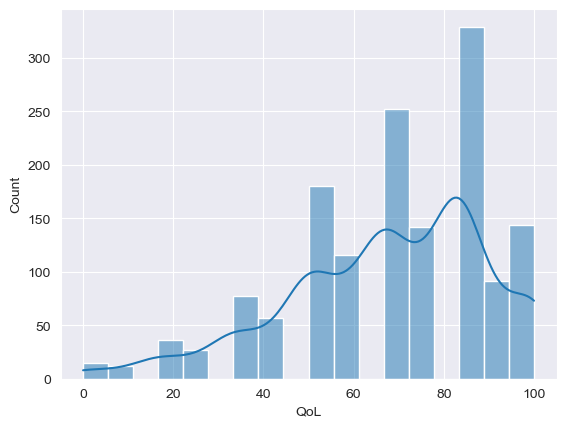

In [136]:
sns.histplot(data=df_qlq_C30, x='QoL', kde=True)

Se pueden ver tres picos principales en la curva de densidad: entre la media y el cuartil superior. Dado que el objetivo es aplicar una clasificación multiclase a la variable. Será necesario agrupar los valores en categorías más amplias que los valores numéricos que toma. Retornaremos este punto en la fase de preparación de los datos.

In [178]:
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df_qlq_C30_null = df_qlq_C30[df_qlq_C30.isnull().any(axis=1)].copy()
df_qlq_C30.dropna(axis=0, inplace=True)
df_qlq_C30['QoL_bins'] = discretizer.fit_transform(df_qlq_C30[['QoL']])
df_qlq_C30

,QoL,Physical functioning,Role functioning,Emotional functioning,Cognitive functioning,Social functioning,Fatigue,Nausea and vomiting,Pain,Dyspnea,Insomnia,Appetite loss,Constipation,Diarrhea,Financial difficulties,QoL_bins
1,50.00,93.33,100.00,25.00,16.67,83.33,66.67,0.00,33.33,0.00,100.00,66.67,0.00,0.00,0.00,1.00
2,50.00,100.00,100.00,66.67,72.22,83.33,22.22,16.67,0.00,0.00,66.67,33.33,0.00,0.00,0.00,1.00
3,33.33,40.00,66.67,16.67,16.67,50.00,66.67,50.00,66.67,0.00,66.67,0.00,66.67,0.00,66.67,0.00
4,50.00,86.67,83.33,25.00,44.44,83.33,44.44,16.67,16.67,33.33,33.33,0.00,0.00,33.33,0.00,1.00
5,100.00,100.00,100.00,25.00,50.00,83.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,66.67,100.00,100.00,91.67,94.44,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1723,66.67,100.00,100.00,83.33,83.33,100.00,22.22,0.00,0.00,0.00,0.00,33.33,0.00,33.33,33.33,1.00
1724,83.33,100.00,100.00,100.00,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
1725,83.33,100.00,100.00,91.67,94.44,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00


In [179]:
df_qlq_C30['QoL_bins'].value_counts()

QoL_bins
2.00    706
1.00    605
0.00    167
Name: count, dtype: int64

<Axes: xlabel='QoL_bins', ylabel='Count'>

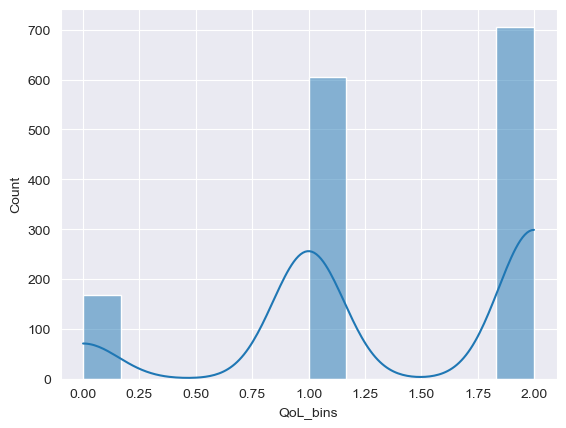

In [180]:
# Gráfica de la distribución
sns.histplot(data=df_qlq_C30, x='QoL_bins', kde=True)

    ### Physical Functioning

In [142]:
# Inspección de la información relevante
inspect_column(df_qlq_C30, 'Physical functioning')

,Property,Value
0,column_name,Physical functioning
1,dtype,float64
2,null_count,249
3,unique_values,"[6.67, 13.33, 20.0, 26.67, 33.33, 40.0, 46.67,..."
4,total_unique_values,15
5,skew,-1.95
6,count,1478.00
7,mean,88.37
8,std,17.49
9,min,6.67


La variable contiene 249 valores nulos, al igual que la anterior, esto puede ser un indicativo de que se trata de las mismas filas. Los valores que toma conforman una serie con un incremento aproximado de 6,67 de 0 a 100. En cuanto a la distribución, se encuentra claramente desplazada hacia los valores altos, como muestra la asimetría de -1,95 y el cuartil superior en el máximo.

<Axes: xlabel='Physical functioning', ylabel='Count'>

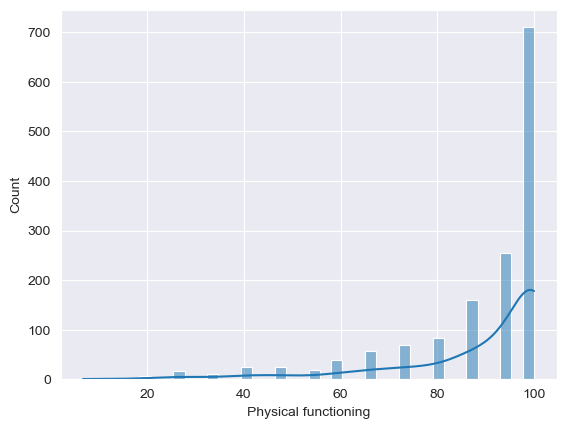

In [143]:
# Gráfica de la distribución
sns.histplot(data=df_qlq_C30, x='Physical functioning', kde=True)

El gráfico muestra claramente la cola hacia la izquierda y la concentración de la densidad en los valores máximos. Una distribución de este tipo puede implicar una posible baja discriminación de la variable. Este efecto se conoce como ceiling (techo) y provoca que la variable aporte poca información en las divisiones de un árbol de decisión. Algunas posibles consecuencias son:

- Podría no ofrecer una disminución significativa de la impureza (o ganancia de información).
- El modelo no distingue bien los casos que podrían variar levemente dentro del rango superior con mayor densidad.
- Podría generar ramas con muy pocos datos (la cola de la distribución) o simplemente descartar esta variable en favor de otras con mayor poder de discriminación.
- Si el modelo decide usar la mínima variación de la cola para dividir, puede terminar en divisiones muy específicas que no generalicen bien.

Para mitigar este problema, volveremos a este punto en la preparación de los datos para aplicar transformaciones no lineales como Box-Cox y Yeo-Johnson con el fin de "estirar" la distribución.

### Role Functioning

In [144]:
# Inspección de la información relevante
inspect_column(df_qlq_C30, 'Role functioning')

,Property,Value
0,column_name,Role functioning
1,dtype,float64
2,null_count,249
3,unique_values,"[0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]"
4,total_unique_values,7
5,skew,-2.26
6,count,1478.00
7,mean,88.48
8,std,23.34
9,min,0.00


La variable contiene 249 valores nulos, como las anteriores. Los valores corresponden a una serie con intervalos de aproximadamente 16,67. Además, como en el caso anterior, la distribución muestra una densidad concentrada en los valores altos con cola hacia la izquierda, potenciada aún más por la menor cantidad de valores únicos.

<Axes: xlabel='Role functioning', ylabel='Count'>

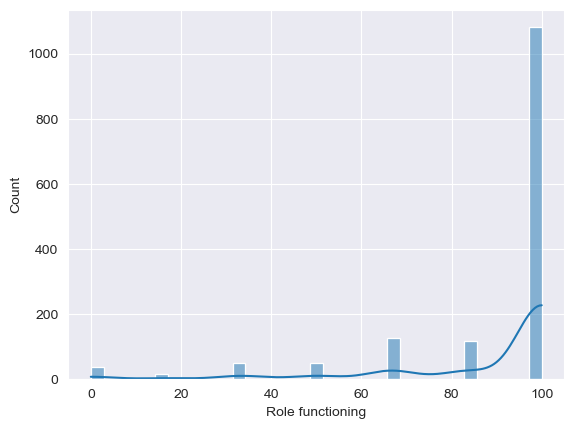

In [145]:
sns.histplot(data=df_qlq_C30, x='Role functioning', kde=True)

Role functioning
100.00    1081
66.67      126
83.33      118
50.00       50
33.33       50
0.00        37
16.67       16
Name: count, dtype: int64